<a href="https://colab.research.google.com/github/riyapalesha/SPPU_LP3_Lab/blob/main/ML/ML_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement K-Means clustering/hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('./datasets/sales_data_sample.csv',encoding='unicode_escape')

In [ ]:
df=data.copy()
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.shape

(2823, 25)

In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
df["ORDERDATE"]=pd.to_datetime(df["ORDERDATE"])
df["ORDERDATE"].dtype

dtype('<M8[ns]')

In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
to_drop=["ADDRESSLINE1","ADDRESSLINE2","STATE","POSTALCODE","TERRITORY"]
df=df.drop(to_drop, axis=1)
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [ ]:
import datetime as dt
snapshot=df["ORDERDATE"].max()+dt.timedelta(days=1)
df_rfm=df.groupby(df["CUSTOMERNAME"]).agg(
    {
        'ORDERDATE' : lambda x : (snapshot-x.max()).days,
        'ORDERNUMBER' : 'count',
        'SALES' : 'sum'
    }
)
df_rfm.rename(columns={
    'ORDERDATE' : 'Recency',
    'ORDERNUMBER' : 'Frequency',
    'SALES' : 'MonetaryValue'
},inplace=True)

In [ ]:
df_rfm.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [ ]:
df_rfm["R"]=pd.qcut(df_rfm["Recency"],q=4,labels=range(4,0,-1))
df_rfm["F"]=pd.qcut(df_rfm["Frequency"],q=4,labels=range(1,5))
df_rfm["M"]=pd.qcut(df_rfm["MonetaryValue"],q=4,labels=range(1,5))

In [ ]:
df_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CUSTOMERNAME,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4
Alpha Cognac,65,20,70488.44,4,2,2
Amica Models & Co.,265,26,94117.26,1,2,3
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4
Atelier graphique,188,7,24179.96,2,1,1


In [ ]:
df_rfm["RFM_Score"]=df_rfm[["R","F","M"]].sum(axis=1)
df_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10
Alpha Cognac,65,20,70488.44,4,2,2,8
Amica Models & Co.,265,26,94117.26,1,2,3,6
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11
Atelier graphique,188,7,24179.96,2,1,1,4


In [ ]:
def level_assign(d):
    if bool(d["RFM_Score"]>=10):
        return "High Level"
    elif bool(d["RFM_Score"]<10) and bool(d["RFM_Score"]>=6):
        return "Medium Level"
    else:
        return "Low Level"
df_rfm["RFM_Level"]=df_rfm.apply(level_assign,axis=1)
df_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10,High Level
Alpha Cognac,65,20,70488.44,4,2,2,8,Medium Level
Amica Models & Co.,265,26,94117.26,1,2,3,6,Medium Level
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11,High Level
Atelier graphique,188,7,24179.96,2,1,1,4,Low Level


In [ ]:
df_orig = df_rfm[['Recency', 'Frequency', 'MonetaryValue']]
df_orig.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [ ]:
df_log=np.log(df_orig)
df_log.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_log)
normalised_df=scaler.transform(df_log)
normalised_df=pd.DataFrame(normalised_df, index=df_log.index, columns=df_log.columns)
normalised_df.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",0.410354,1.224468,0.969091
Alpha Cognac,-0.409509,-0.391907,-0.384655
Amica Models & Co.,0.634398,0.061124,0.100944
"Anna's Decorations, Ltd",-0.219030,1.046298,0.928021
Atelier graphique,0.379399,-2.204660,-2.181842


In [ ]:
from sklearn.cluster import KMeans
sse={}
for k in range(1,21):
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(normalised_df)
    sse[k]=km.inertia_

c:\users\riyap\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\riyap\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\riyap\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\riyap\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

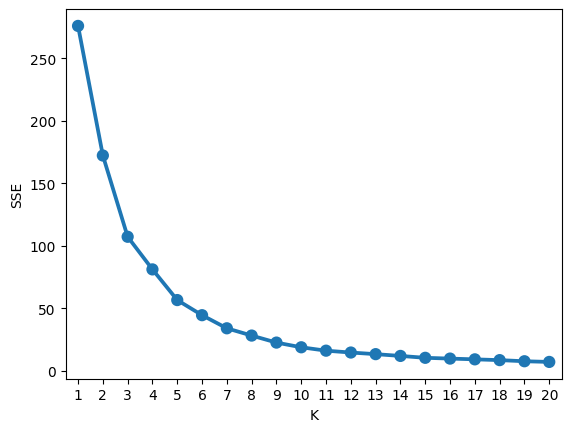

In [ ]:
plt.xlabel("K")
plt.ylabel("SSE")
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=1)
kmeans.fit(normalised_df)
labels=kmeans.labels_
ans=df_orig.assign(Cluster=labels)
ans.head()

c:\users\riyap\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,MonetaryValue,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,3
Alpha Cognac,65,20,70488.44,0
Amica Models & Co.,265,26,94117.26,0
"Anna's Decorations, Ltd",84,46,153996.13,3
Atelier graphique,188,7,24179.96,2
